# Analyzing the sales pattern, to report to the company and make a model to predict customer which will be loss maker in future

## Importing of libraries and data

In [1]:
#Importing of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-dark')

In [2]:
#Import data
data=pd.read_csv(r"C:\Users\Rano's PC\Machine\data-science-projects\Customer-Analysis\SaaS-Sales.csv")

In [3]:
data.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [4]:
#Remove unnecessary columns
data.drop(columns=['Row ID','Date Key','Customer','Contact Name','Customer','License'],inplace=True)

In [5]:
data.head()

,Order ID,Order Date,Country,City,Region,Subregion,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,11/9/2022,Ireland,Dublin,EMEA,UKIR,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,11/9/2022,Ireland,Dublin,EMEA,UKIR,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820
2,AMER-2022-138688,6/13/2022,United States,New York City,AMER,NAMER,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,10/11/2021,Germany,Stuttgart,EMEA,EU-WEST,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,10/11/2021,Germany,Stuttgart,EMEA,EU-WEST,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164


## Checking the dataset

In [6]:
# Checking the information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Order ID     9994 non-null   object 
 1   Order Date   9994 non-null   object 
 2   Country      9994 non-null   object 
 3   City         9994 non-null   object 
 4   Region       9994 non-null   object 
 5   Subregion    9994 non-null   object 
 6   Customer ID  9994 non-null   int64  
 7   Industry     9994 non-null   object 
 8   Segment      9994 non-null   object 
 9   Product      9994 non-null   object 
 10  Sales        9994 non-null   float64
 11  Quantity     9994 non-null   int64  
 12  Discount     9994 non-null   float64
 13  Profit       9994 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 1.1+ MB


In [7]:
data.describe()

,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,1049.771963,229.858001,3.789574,0.156203,28.656896
std,29.719388,623.245101,2.225110,0.206452,234.260108
min,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,1076.000000,209.940000,5.000000,0.200000,29.364000
max,1101.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
data.duplicated().sum()

np.int64(1)

In [9]:
data[data.duplicated(keep=False)]

,Order ID,Order Date,Country,City,Region,Subregion,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
3405,AMER-2020-150119,4/23/2020,Mexico,Mexico City,AMER,LATAM,1032,Finance,Enterprise,FinanceHub,281.372,2,0.3,-12.0588
3406,AMER-2020-150119,4/23/2020,Mexico,Mexico City,AMER,LATAM,1032,Finance,Enterprise,FinanceHub,281.372,2,0.3,-12.0588


I found one duplicate row, which should be removed

In [10]:
# Remove the duplicate value
data=data[~data.duplicated()]

In [11]:
#Check how many uniqe values are there in each column
data.nunique()

Order ID       5009
Order Date     1237
Country          48
City            262
Region            3
Subregion        12
Customer ID      99
Industry         10
Segment           3
Product          14
Sales          5825
Quantity         14
Discount         12
Profit         7287
dtype: int64

There is no single valued column

### Cleaning of Data

In [12]:
data.head()

,Order ID,Order Date,Country,City,Region,Subregion,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,11/9/2022,Ireland,Dublin,EMEA,UKIR,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,11/9/2022,Ireland,Dublin,EMEA,UKIR,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820
2,AMER-2022-138688,6/13/2022,United States,New York City,AMER,NAMER,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,10/11/2021,Germany,Stuttgart,EMEA,EU-WEST,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,10/11/2021,Germany,Stuttgart,EMEA,EU-WEST,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164


In [13]:
#Lower Casing the columns
data.columns=data.columns.str.lower()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order id     9993 non-null   object 
 1   order date   9993 non-null   object 
 2   country      9993 non-null   object 
 3   city         9993 non-null   object 
 4   region       9993 non-null   object 
 5   subregion    9993 non-null   object 
 6   customer id  9993 non-null   int64  
 7   industry     9993 non-null   object 
 8   segment      9993 non-null   object 
 9   product      9993 non-null   object 
 10  sales        9993 non-null   float64
 11  quantity     9993 non-null   int64  
 12  discount     9993 non-null   float64
 13  profit       9993 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 1.1+ MB


In [15]:
#Changing customer ID to string values
data['customer id']=data['customer id'].astype('str')

In [16]:
#Changing discount values to actual percent values
data['discount']=data['discount']*100

In [17]:
# Rounding the sales values
data['sales']=data['sales'].round(2)

In [18]:
# Rounding the profit values
data['profit']=data['profit'].round(2)

In [19]:
# Changing the data type of order date column
data['order date']=pd.to_datetime(data['order date'],errors='coerce')

In [20]:
data.head()

,order id,order date,country,city,region,subregion,customer id,industry,segment,product,sales,quantity,discount,profit
0,EMEA-2022-152156,2022-11-09,Ireland,Dublin,EMEA,UKIR,1017,Energy,SMB,Marketing Suite,261.96,2,0.0,41.91
1,EMEA-2022-152156,2022-11-09,Ireland,Dublin,EMEA,UKIR,1017,Energy,SMB,FinanceHub,731.94,3,0.0,219.58
2,AMER-2022-138688,2022-06-13,United States,New York City,AMER,NAMER,1056,Energy,Strategic,FinanceHub,14.62,2,0.0,6.87
3,EMEA-2021-108966,2021-10-11,Germany,Stuttgart,EMEA,EU-WEST,1031,Energy,SMB,ContactMatcher,957.58,5,45.0,-383.03
4,EMEA-2021-108966,2021-10-11,Germany,Stuttgart,EMEA,EU-WEST,1031,Energy,SMB,Marketing Suite - Gold,22.37,2,20.0,2.52


In [21]:
data.to_csv(r"C:\Users\Rano's PC\Machine\data-science-projects\Customer-Analysis\sales_cleaned.csv",index=False)

### Creating the new data frame

In [22]:
df=data.groupby('customer id').agg({
    'sales':'sum',
    'profit':'sum',
    'discount':'mean',
    'quantity':'sum',
    'product':'nunique',
    'segment':'first',
    'industry':'first',
    'region':'first'
}).reset_index()

In [23]:
df.head()

,customer id,sales,profit,discount,quantity,product,segment,industry,region
0,1001,12617.14,2281.78,12.985075,266,11,Enterprise,Healthcare,APJ
1,1002,27278.57,3312.65,16.274510,608,14,SMB,Healthcare,EMEA
2,1003,39941.63,-2796.32,12.380952,411,13,Strategic,Finance,AMER
3,1004,23189.20,2163.96,15.447761,507,13,SMB,Tech,AMER
4,1005,33514.94,5436.18,14.467153,556,12,SMB,Finance,AMER


In [24]:
#Creating the Avarage sales column
df['avarage sales']=(df['sales']/df['quantity']).round(2)

In [25]:
# Creating avg profit column
df['avarage profit']=(df['profit']/df['quantity']).round(2)

In [26]:
# Creating profit per sales column
df['profit per sales']=(df['profit']/df['sales']).round(2)

In [27]:
# Creating discount per profit ratio
df['discount to profit ratio']=((df['discount']/df['quantity'])/df['avarage profit']*100).round(2)

In [30]:
df.head()

,customer id,sales,profit,discount,quantity,product,segment,industry,region,avarage sales,avarage profit,profit per sales,discount to profit ratio
0,1001,12617.14,2281.78,12.985075,266,11,Enterprise,Healthcare,APJ,47.43,8.58,0.18,0.57
1,1002,27278.57,3312.65,16.274510,608,14,SMB,Healthcare,EMEA,44.87,5.45,0.12,0.49
2,1003,39941.63,-2796.32,12.380952,411,13,Strategic,Finance,AMER,97.18,-6.80,-0.07,-0.44
3,1004,23189.20,2163.96,15.447761,507,13,SMB,Tech,AMER,45.74,4.27,0.09,0.71
4,1005,33514.94,5436.18,14.467153,556,12,SMB,Finance,AMER,60.28,9.78,0.16,0.27


<Axes: >

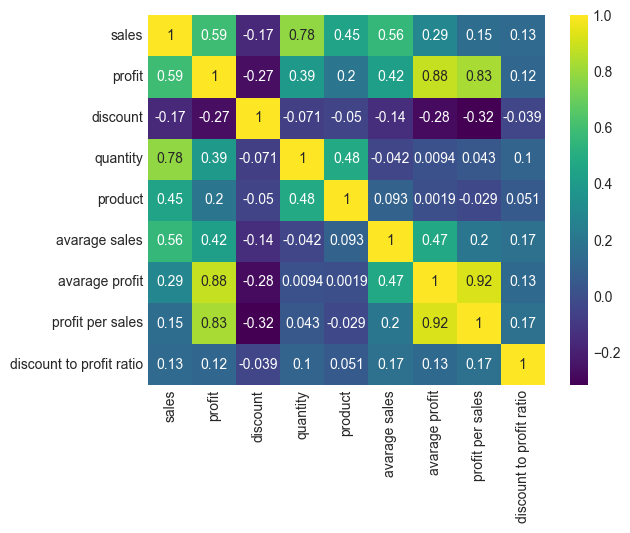

In [31]:
sns.heatmap(df.corr(numeric_only=True),cbar=True,annot=True,cmap='viridis')

In [32]:
df.shape

(99, 13)

In [33]:
# Dropping the customer id column
df.drop(columns=['customer id'],inplace=True)

In [34]:
df.head()

,sales,profit,discount,quantity,product,segment,industry,region,avarage sales,avarage profit,profit per sales,discount to profit ratio
0,12617.14,2281.78,12.985075,266,11,Enterprise,Healthcare,APJ,47.43,8.58,0.18,0.57
1,27278.57,3312.65,16.274510,608,14,SMB,Healthcare,EMEA,44.87,5.45,0.12,0.49
2,39941.63,-2796.32,12.380952,411,13,Strategic,Finance,AMER,97.18,-6.80,-0.07,-0.44
3,23189.20,2163.96,15.447761,507,13,SMB,Tech,AMER,45.74,4.27,0.09,0.71
4,33514.94,5436.18,14.467153,556,12,SMB,Finance,AMER,60.28,9.78,0.16,0.27


### Importing libraries for machine learning

In [35]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,root_mean_squared_error,mean_squared_error

In [40]:
X=df.drop(columns=['profit'])
y=df['profit']

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=45,test_size=0.2)

In [42]:
X_train.head(1)

,sales,discount,quantity,product,segment,industry,region,avarage sales,avarage profit,profit per sales,discount to profit ratio
45,24123.9,7.842105,372,12,SMB,Retail,EMEA,64.85,14.19,0.22,0.15


In [43]:
ohe_encoding=ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[4,5,6])
],remainder='passthrough')

In [44]:
scaling=ColumnTransformer(transformers=[
    ('scaling',StandardScaler(),[0,1,2,3,7,8,9,10])
],remainder='passthrough')

In [45]:
model=RandomForestRegressor()

In [46]:
pipe=Pipeline([
    ('ohe_encoding',ohe_encoding),
    ('scaling',scaling),
    ('model',model)
])

In [47]:
param_grid_lr = {
    'model': [LinearRegression()],
    'model__fit_intercept': [True, False],
}

param_grid_dt = {
    'model': [DecisionTreeRegressor()],
    'model__max_depth': [None, 3, 5, 10],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__criterion': ['squared_error', 'absolute_error']
}

param_grid_rf = {
    'model': [RandomForestRegressor()],
    'model__n_estimators': [50, 100],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
    'model__bootstrap': [True, False]
}

param_grid_svr = {
    'model': [SVR()],
    'model__kernel': ['linear', 'rbf'],
    'model__C': [0.1, 1, 10],
    'model__gamma': ['scale', 'auto'],
    'model__epsilon': [0.01, 0.1]
}

In [48]:
param_grid_all = [
    param_grid_lr,
    param_grid_dt,
    param_grid_rf,
    param_grid_svr
]

In [49]:
grid = GridSearchCV(pipe, param_grid_all, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

# Best model and performance
print("Best Estimator:", grid.best_estimator_)
print("Best Score:", grid.best_score_)
print("Best Params:", grid.best_params_)

Best Estimator: Pipeline(steps=[('ohe_encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [4, 5, 6])])),
                ('scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', StandardScaler(),
                                                  [0, 1, 2, 3, 7, 8, 9, 10])])),
                ('model', LinearRegression(fit_intercept=False))])
Best Score: 0.9181467161471266
Best Params: {'model': LinearRegression(), 'model__fit_intercept': False}


In [52]:
lr_model=grid.best_estimator_

In [53]:
lr_prediction=lr_model.predict(X_test)

In [55]:
print("MAE:", mean_squared_error(y_test, lr_prediction))
print("RMSE:", root_mean_squared_error(y_test, lr_prediction))
print("R² Score:", r2_score(y_test, lr_prediction))

MAE: 1578368.8669525837
RMSE: 1256.3315115655516
R² Score: 0.710867923901646


In [56]:
def is_loss(prediction):
    if prediction>0:
        print('Not in loss')
    else:
        print('In loss')

In [65]:
new=pd.DataFrame([[39941.63,12.380952,411,13,'Strategic','Finance','AMER',97.18,-6.80,-0.07,-0.44]],columns=X_train.columns)

In [68]:
is_loss(lr_model.predict(new))

In loss
